In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
%matplotlib inline

In [3]:
import champy.plot_chameleon as plt_chi
import champy.sim_chameleon as sim_chi

# Run many simulations

In [73]:
kwargs_dflt = {
    "err": 1E-8,
    "n": 0.5,
    "print_par" : 1,
    "out_dir" : "../output/"
}

kwargs_sims = {
    "mod" : 0,
    "Omega_m" : 1e4,
#     "c" : [4, 6, 16],
    "M200_sun" : 1E-10,
    "Ys" : [1E-14, 1E-12, 1E-10, 1E-8],
    "R": 5,
#     "R_eq" : [-10, 10, 50]
}

In [74]:
results_all = sim_chi.run_many_sims(kwargs_dflt, kwargs_sims, stdout=None)

Running simulation 1/4
Running simulation 2/4
Running simulation 3/4
Running simulation 4/4


# Plots

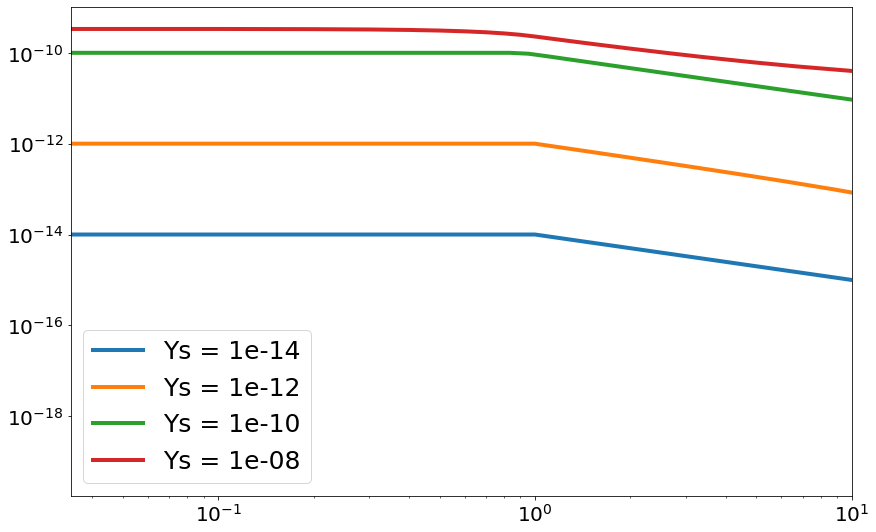

In [75]:
sim_chi.plot_simulations(results_all, data_col=2)